# Experiments and tests

In [1]:
import GeneticPGCSOptimizer as go
from communication_grid import Grid
import matplotlib.pyplot as plt
import os
from utils import *

source_corpus = ["default.csv"]
training_corpus = []

for root, dirs, files in os.walk("./training_corpora"):
    for name in files:
        training_corpus.append(os.path.join(root,name))

if __name__ == '__main__':
    optimizer = go.GeneticPGCSOptimizer(source_corpus,training_corpus,pop_size = 300, select_number = 50,
                                           gen_number = 500, randomizer = True, distance_formula = "euclidean",
                                           cost_average = False,nb_proc = 1)

    optimal_grid,cost = optimizer.genetic_pgcs_optimization()

####### Genetic Pictogram Grid Communication Optimizer #######

## Optimizer Parameters ##
------------------------------------------------------------------------
  INITIAL POPULATION SIZE : 300

  NUMBER OF GENERATION : 500

  CROSSOVER RATE : 50.0%     MUTATION RATE : 50.0%

  CROSSOVER INFORMATION RATE : 50.0%

  DISTANCE FORMULA (COST) : EUCLIDEAN
------------------------------------------------------------------------
  NUMBER OF PROCESSES : 1
------------------------------------------------------------------------



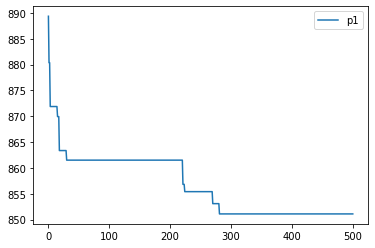

In [2]:
#Display the grid in one image (stored as "default.png")
optimal_grid.to_csv()

#Plot the history
histos = optimizer.fitness_history("only_best")

i = 1
for hist in histos:
    plt.plot(hist,label = "p"+str(i))
    i = i + 1

plt.legend()
plt.show()